In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from opqua.model import Model

Simple model of a vector-borne disease with 10% host mortality spreading among hosts and vectors that have natural birth and death rates in a single population. There is no evolution and pathogen genomes don't affect spread.

Simulating time: 73.86191637241713, event: DIE_VECTOR
Simulating time: 196.27448955508405, event: DIE_HOST
Simulating time: 200.000617267833 END
Saving file...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Batch computation too fast (0.19340171051025393s.) Setting batch_size=2.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Batch computation too fast (0.019112348556518555s.) Setting batch_size=4.
[Parallel(n_jobs=8)]: Done  44 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Batch computation too fast (0.0218963623046875s.) Setting batch_size=8.
[Parallel(n_jobs=8)]: Done  76 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 120 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Batch computation too fast (0.04172182083129883s.) Setting batch_size=16.
[Parallel(n_jobs=8)]: Done 224 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Batch computation too fast (0.0538

...file saved.


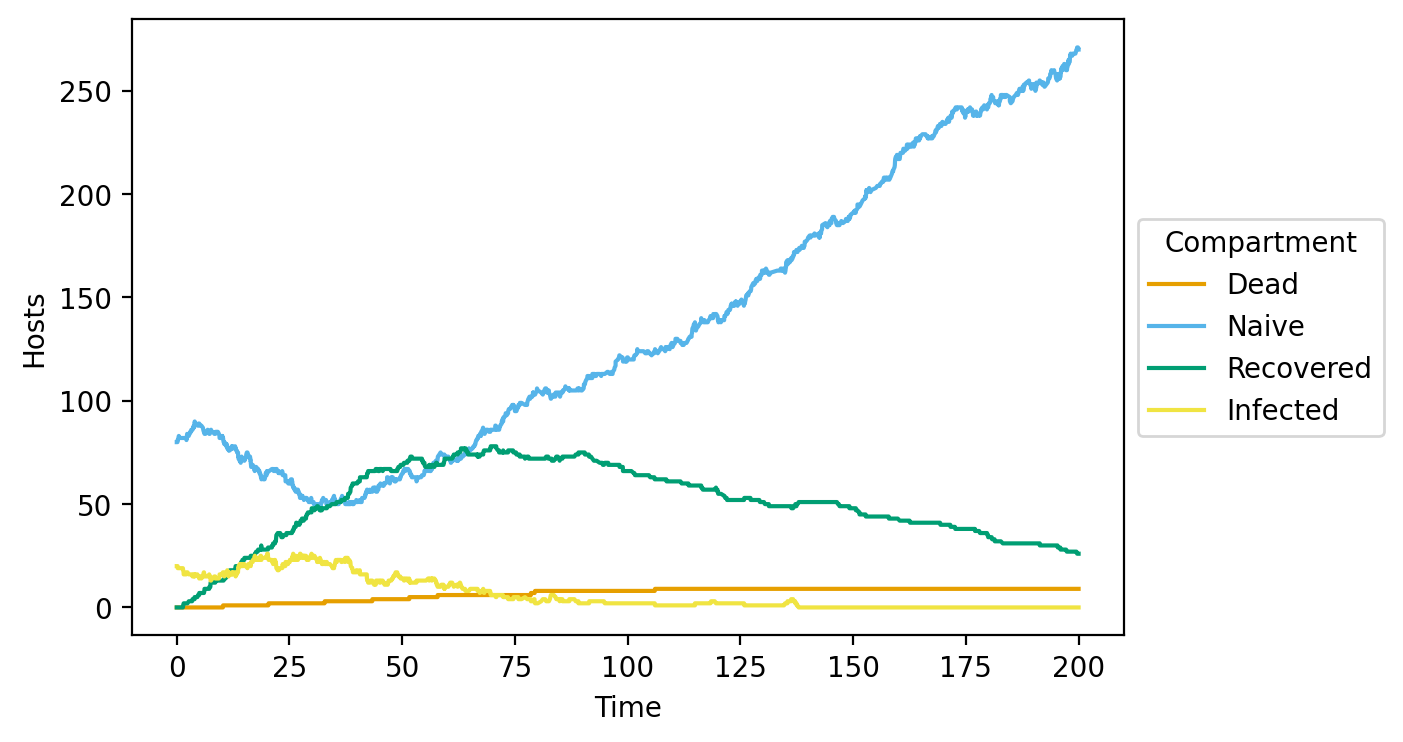

In [2]:
my_model = Model() # Make a new model object.
my_model.newSetup('my_setup', preset='vector-borne',
        # Create a new set of parameters called "my_setup" to be used to
        # simulate a population in the model. Use the default parameter set for
        # a vector-borne model.
    mortality_rate_host=1e-2,
        # change the default host mortality rate to 10% of recovery rate
    protection_upon_recovery_host=[0,10],
        # make hosts immune to the genome that infected them if they recover
        # [0,10] means that pathogen genome positions 0 through 9 will be saved
        # as immune memory
    birth_rate_host=1.5e-2,
        # change the default host birth rate to 0.015 births/time unit
    death_rate_host=1e-2,
        # change the default natural host death rate to 0.01 births/time unit
    birth_rate_vector=1e-2,
        # change the default vector birth rate to 0.01 births/time unit
    death_rate_vector=1e-2
        # change the default natural vector death rate to 0.01 deaths/time unit
    )

my_model.newPopulation(
    'my_population', 'my_setup', num_hosts=100, num_vectors=100
    )
    # Create a new population of 100 hosts and 100 vectors called
    # "my_population". The population uses parameters stored in "my_setup".
my_model.addPathogensToHosts( 'my_population',{'AAAAAAAAAA':20} )
    # Add pathogens with a genome of "AAAAAAAAAA" to 20 random hosts in
    # population "my_population".

my_model.run(0,200) # Run the simulation for 200 time units.
data = my_model.saveToDataFrame('vector-borne_birth-death_example.csv')
    # Save the model results to a table.
graph = my_model.compartmentPlot('vector-borne_birth-death_example.png', data)
    # Plot the number of susceptible and infected hosts in the model over time.